In [ ]:
!pip install --user xgboost

In [1]:
!pwd

/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector
df_infer=pd.read_csv("data/GD_Part2_clean.csv")

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier, XGBRegressor

In [30]:
df_infer.head()

,Unnamed: 0,CPR_NO,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
0,0,70913390,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
1,1,71105956,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
2,2,70712190,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
3,3,70207496,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
4,4,70507953,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [31]:
df_infer.set_index('CPR_NO', inplace=True)
# df_infer.index=df.CPR_NO
# df_infer.drop(["Unnamed: 0" ], axis=1, inplace=True)

In [32]:
df_infer.SCH_NM.nunique()

99

In [33]:
df_infer.head()

,Unnamed: 0,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
CPR_NO,,,,,,,,,,,,,,,,
70913390,0,المعهد الديني الجعفري,Cap,Science,M,28.0,30.0,17.0,17.0,45.0,33.0,90.0,80,85,53.7,92.9
71105956,1,المعهد الديني الجعفري,Cap,Science,M,27.0,29.0,14.0,16.0,41.5,37.0,83.0,82,83,49.7,89.5
70712190,2,المعهد الديني الجعفري,Cap,Science,M,27.0,27.0,13.0,15.0,27.5,37.0,68.0,79,74,52.1,86.2
70207496,3,المعهد الديني الجعفري,Cap,Science,M,26.0,24.5,15.0,12.0,44.0,32.5,85.0,69,77,52.9,89.9
70507953,4,المعهد الديني الجعفري,Cap,Science,M,25.0,28.0,14.0,15.0,31.5,37.0,71.0,80,76,52.1,86.2


In [34]:
df_infer.drop(['TOTAL1','ACHIEVEMENTS2','MIDTERM2', 'FINAL2', 'TOTAL2', 'D_MARK', 'Unnamed: 0', "GPA"], axis=1, inplace=True)
# y=df_infer['NAT_class']

In [35]:
df_infer.keys()

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'MIDTERM1', 'FINAL1', 'NAT_MARK'],
      dtype='object')

In [36]:
df_infer[df_infer.isna().any(axis=1)]

,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1,NAT_MARK
CPR_NO,,,,,,,,
70711321,مدرسة أحمد الفاتح الابتدائية الاعدادية للبنين,South,Science,M,NaN,NaN,NaN,45.2
60820420,مدرسة الرفاع الشرقي الابتدائية للبنات,South,Science,F,NaN,NaN,NaN,41.1
70613516,مدرسة الرفاع الشرقي الابتدائية للبنات,South,Science,F,NaN,NaN,NaN,37.7
60820438,مدرسة الرفاع الشرقي الابتدائية للبنات,South,Science,F,NaN,NaN,NaN,59.8
70800898,مدرسة الفارابي الإعدادية للبنين,North,Science,M,NaN,NaN,82.0,36.5
70116075,مدرسة المستقبل الابتدائية للبنات,South,Science,F,NaN,NaN,NaN,44.2
71001093,مدرسة رقية الابتدائية للبنات,Muharaq,Science,F,NaN,NaN,NaN,63.4
70922870,مدرسة سمية الابتدائية للبنات,Cap,Science,F,NaN,NaN,NaN,46.1
70405786,مدرسة عراد الابتدائية الإعدادية للبنين,Muharaq,Science,M,NaN,NaN,NaN,0.0


In [37]:
df_infer.dropna(inplace=True)

In [38]:

label_encoder = LabelEncoder()

for i in ['SCH_NM', "PROV_NM"]:

    df_infer[i] = label_encoder.fit_transform(df_infer[i])

In [39]:
df_infer.Teacher_Gender=((df_infer.Teacher_Gender=="M")+0)
df_infer.SUBM=((df_infer.SUBM=="Math")+0)

In [42]:
df_infer.head()

,NAT_MARK,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1
CPR_NO,,,,,,,,
70913390,53.7,0,0,0,1,28.0,17.0,45.0
71105956,49.7,0,0,0,1,27.0,14.0,41.5
70712190,52.1,0,0,0,1,27.0,13.0,27.5
70207496,52.9,0,0,0,1,26.0,15.0,44.0
70507953,52.1,0,0,0,1,25.0,14.0,31.5


In [41]:
df_infer=df_infer[[ 'NAT_MARK','SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender', 'ACHIEVEMENTS1',
       'MIDTERM1', 'FINAL1']]

In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from  scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [42]:
bins = [0, 60, 70, 80, 90, 100]
names = ['0-60', '60-70', '70-80', '80-90', '90-100']

df_infer['NAT_MARK'] = pd.cut(df_infer['NAT_MARK'], bins, labels=names)

In [43]:
df_infer["NAT_MARK"].value_counts()

0-60      19242
60-70      4023
70-80       692
80-90        33
90-100        0
Name: NAT_MARK, dtype: int64

In [25]:
df_infer.head()

,NAT_MARK,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,MIDTERM1,FINAL1
CPR_NO,,,,,,,,
70913390,53.7,0,0,0,1,28.0,17.0,45.0
71105956,49.7,0,0,0,1,27.0,14.0,41.5
70712190,52.1,0,0,0,1,27.0,13.0,27.5
70207496,52.9,0,0,0,1,26.0,15.0,44.0
70507953,52.1,0,0,0,1,25.0,14.0,31.5


In [140]:
df_infer.to_csv("data/aws_inference_std_regr_29_4.csv" , index=False)

In [141]:
! aws  s3  cp "data/aws_inference_std_regr_29_4.csv"  s3://sec-students2016/sam1610

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [136]:
! aws s3 ls 

libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [44]:
y=df_infer["NAT_MARK"].ravel()
X=df_infer.drop(['NAT_MARK'], axis=1)

In [21]:
column_trans=make_column_transformer(
(StandardScaler(), ['ACHIEVEMENTS1', 'MIDTERM1' , 'FINAL1']),
(OneHotEncoder(), ['PROV_NM', 'SCH_NM']),
   #PCA(n_components=.95, svd_solver="full"),
 remainder="passthrough")



In [58]:
XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [115]:
pipe=make_pipeline( column_trans, 
                   #SVC()
#XGBRegressor(  objective="reg:squarederror", num_round=150, nthread=-1)
                  LinearRegression()
                  )

In [87]:
np.arange(5, 500, 80)

array([  5,  85, 165, 245, 325, 405, 485])

In [109]:
from scipy import stats as st
# A parameter grid for XGBoost
paramR = {    'xgbrregressor__max_depth':np.arange(4,10), 
              'xgbrregressor__eta':np.arange(0.1,.7, .02), 
              'xgbrregressor__scale_pos_weight':np.arange(1,21,4 ),
              'xgbrregressor__n_estimators':np.arange(100,500,80 )

         }

param_1={
    "svc__C":stats.expon(scale=100), 
    "svc__gamma":stats.expon(scale=.1),
    "svc__class_weight":["balanced", "None"] }

params = {'xgbrregressor__n_estimators':np.arange(100,500,80 ), 'xgbrregressor__min_child_weight':[4,5], 'xgbrregressor__gamma':[i/10.0 for i in range(3,6)],  'xgbrregressor__subsample':[i/10.0 for i in range(6,11)],
'xgbrregressor__colsample_bytree':[i/10.0 for i in range(6,11)], 'xgbrregressor__max_depth': [2,3,4]}

In [110]:

X_train,X_test,y_train, y_test=train_test_split(X,y , test_size=0.3,random_state=42)
X_valid,X_test,y_valid, y_test=train_test_split(X_test,y_test , test_size=0.5,random_state=123)

In [116]:
pipe.fit(X_train,y_train) 

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['ACHIEVEMENTS1', 'MIDTERM1',
                                                   'FINAL1']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<clas

In [112]:

skf = StratifiedKFold(n_splits=10 ,shuffle = True, random_state = 42)

GridSearch =GridSearchCV(pipe, params , n_jobs=-1,
                                  )

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable

#timer(start_time) # timing ends here for "start_time" variable

In [114]:
# GridSearch.fit(X_train, y_train)

In [57]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (3, 5))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([45.06857574,  9.46135557, 39.07052221, 15.04191513, 22.12282875,
       28.9378767 ,  9.19555049, 16.43883669, 29.75552979, 13.32436202]), 'std_fit_time': array([1.84490535, 0.11855011, 0.27310477, 0.20600505, 0.17487082,
       0.26987305, 0.11358366, 0.12598477, 0.12815773, 0.73891331]), 'mean_score_time': array([0.92446196, 0.17434592, 0.59523089, 0.14403648, 0.17777848,
       0.44407551, 0.1334836 , 0.28353562, 0.43394079, 0.18117583]), 'std_score_time': array([0.12631951, 0.02224969, 0.0234751 , 0.01358194, 0.00497099,
       0.03474379, 0.00578946, 0.00855257, 0.01792666, 0.0243495 ]), 'param_xgbclassifier__colsample_bytree': masked_array(data=[0.34708610696262626, 0.15041677639819287,
                   0.551003510568888, 0.010700889256912895,
                   0.016359674697745664, 0.05199909689225389,
                   0.5431731119758383, 0.06854643368675156,
                   0.2841523922560336, 0.5589969920043588],
             mas

In [58]:
y_train.head()

CPR_NO
70315329    0-60
71011617    0-60
70616426    0-60
70213348    0-60
70508437    0-60
Name: NAT_MARK, dtype: category
Categories (5, object): [0-60 < 60-70 < 70-80 < 80-90 < 90-100]

# Learning curve

In [59]:
from sklearn.model_selection import learning_curve

train_size, train_score, test_score =learning_curve(estimator=pipe, 
                                                    X=X_train, 
                                                    y=y_train,
                                                    train_sizes=np.linspace(0.1, 1, 10 ), scoring='f1_weighted',
                                                    
                                                    cv=10 , n_jobs=1)

In [121]:
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

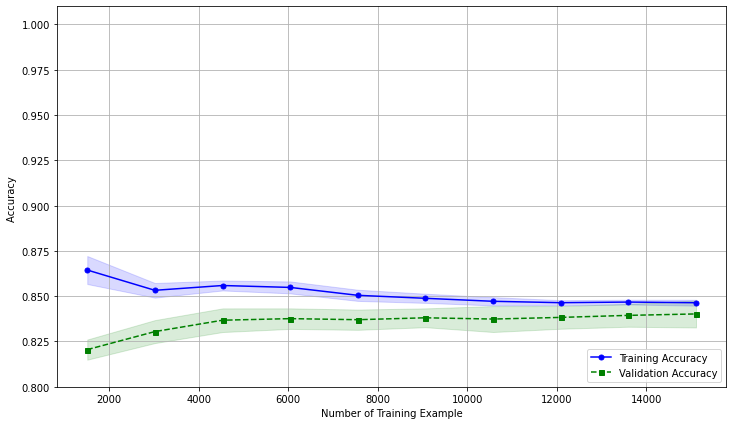

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plotGraph(train_size, train_mean, test_mean, 
          train_std, test_std,"linear", "Number of Training Example")

# validation curves

In [84]:
np.arange(0, 1.2,0.2 )

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [88]:
# from sklearn.model_selection import validation_curve
param_range =np.arange(0, 1.2, 0.2)
train_score, test_score =validation_curve(
    estimator=pipe, X=X_train, y=y_train, 
    param_name="xgbclassifier__reg_alpha", param_range=param_range, 
    cv=10,
    n_jobs=-1

)
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

# plt.plot(param_range, train_mean, 
#         color="blue", 
#          marker="o",
#          markersize=5, 
#          label="Training Accuracy "
#         )


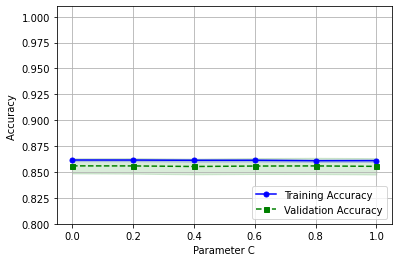

In [90]:
plotGraph(param_range, train_mean, test_mean, train_std, test_std, "linear", "Parameter C")

In [128]:
random_search.best_params_

{'xgbclassifier__colsample_bytree': 0.5589969920043588,
 'xgbclassifier__learning_rate': 0.5099169470416985,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__min_child_weight': 2,
 'xgbclassifier__n_estimators': 180,
 'xgbclassifier__scale_weight': 61}

In [127]:
clf=random_search.best_estimator_

In [19]:
pipe=make_pipeline( column_trans, 
XGBClassifier(colsample_bytree=0.31033775002511965,
 learning_rate= 0.09572009075316446,
 max_depth= 5,
 min_child_weight= 2,
 n_estimators= 408))

In [138]:
xg_classifier=XGBClassifier(colsample_bytree=0.5589969920043588,
 learning_rate= 0.5099169470416985,
 max_depth= 5,
 min_child_weight= 2,
 n_estimators= 180, scale_weight= 61)

In [48]:
import xgboost as xgb
regressor=xgb.XGBRegressor(max_depth=5, eta=0.1, subsample=0.7, num_round=150, n_estimators=150)
regressor.fit(X_train,y_train, eval_set=[(X_train,y_train), (X_valid,y_valid)]) 

[10:32:33] WARNING: /tmp/xgboost-20191007-44032-1f3rb3e/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:46.6325	validation_1-rmse:47.0324
[1]	validation_0-rmse:42.089	validation_1-rmse:42.4892
[2]	validation_0-rmse:38.0115	validation_1-rmse:38.4131
[3]	validation_0-rmse:34.3515	validation_1-rmse:34.7559
[4]	validation_0-rmse:31.075	validation_1-rmse:31.4854
[5]	validation_0-rmse:28.1446	validation_1-rmse:28.5651
[6]	validation_0-rmse:25.52	validation_1-rmse:25.9451
[7]	validation_0-rmse:23.1795	validation_1-rmse:23.6151
[8]	validation_0-rmse:21.0866	validation_1-rmse:21.5328
[9]	validation_0-rmse:19.2187	validation_1-rmse:19.6819
[10]	validation_0-rmse:17.5566	validation_1-rmse:18.0331
[11]	validation_0-rmse:16.0886	validation_1-rmse:16.5858
[12]	validation_0-rmse:14.7909	validation_1-rmse:15.3068
[13]	validation_0-rmse:13.6511	validation_1-rmse:14.1873
[14]	validation_0-rmse:12.6508	validation_1-rmse:13.2063
[15]	va

[142]	validation_0-rmse:6.02283	validation_1-rmse:7.15547
[143]	validation_0-rmse:6.0186	validation_1-rmse:7.15702
[144]	validation_0-rmse:6.0133	validation_1-rmse:7.15358
[145]	validation_0-rmse:6.00906	validation_1-rmse:7.15266
[146]	validation_0-rmse:6.0064	validation_1-rmse:7.15538
[147]	validation_0-rmse:6.00531	validation_1-rmse:7.15505
[148]	validation_0-rmse:6.00378	validation_1-rmse:7.1553
[149]	validation_0-rmse:6.00142	validation_1-rmse:7.15606


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, num_round=150, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [50]:
eval_result=regressor.evals_result()

In [51]:
t_round=range(len(eval_result["validation_0"]["rmse"]))

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

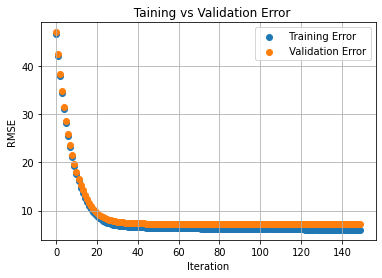

In [54]:
plt.scatter(t_round, eval_result["validation_0"]["rmse"], label=" Training Error")
plt.scatter(t_round, eval_result["validation_1"]["rmse"], label=" Validation Error")
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("  Taining vs Validation Error")
plt.legend()
plt.show()



In [55]:
import xgboost as xgb

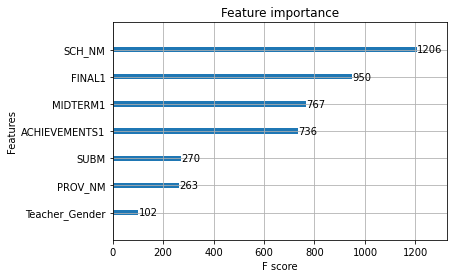

In [56]:
xgb.plot_importance(regressor)

In [153]:
clf.score(X_test, y_test)

0.855515420950264

In [154]:
pd.crosstab(y_test, clf.predict(X_test))

col_0,0-60,60-70,70-80
NAT_MARK,,,
0-60,2716,155,3
60-70,260,341,21
70-80,8,67,22
80-90,1,2,3


In [162]:
scores=cross_val_score( clf, X, y,cv=5,  scoring="recall_macro")

In [163]:
print(f'CV Accuracy   {np.mean(scores):.3f} +/-  {np.std(scores)}')

CV Accuracy   0.606 +/-  0.053107044623640326


In [155]:
X_new=X.sample(5, random_state=42)
clf.fit(X, y )

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['ACHIEVEMENTS1', 'MIDTERM1',
                                                   'FINAL1']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<clas

In [163]:
y_pred=clf.predict(X_test)
y_pred

array(['0-60', '0-60', '0-60', ..., '0-60', '60-70', '0-60'], dtype=object)

In [ ]:
cl=["0-60","60-70" "70-80", "80-90","90-100"]
np.array([ cl[x] for x in y_pred])

In [164]:
from sklearn.metrics import confusion_matrix
cfm= pd.DataFrame(confusion_matrix(y_test, y_pred))
cfm.index.name="Actual"
cfm.columns.name="Predicted"

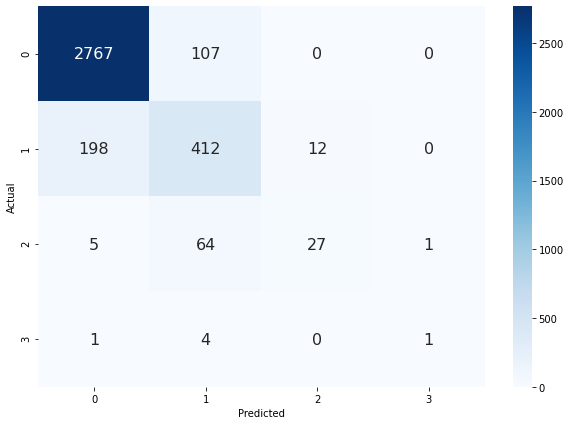

In [165]:
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib  inline
plt.figure(figsize=(10,7))
sns.heatmap(cfm , cmap="Blues", annot=True, annot_kws={"size":16}, fmt="g")

In [164]:
from sklearn.model_selection import learning_curve

In [165]:
train_sizes, train_scores, test_scores= learning_curve(pipe, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), 
                                                      cv=10, n_jobs=-1)

In [ ]:
plt.plot(train_sizes, np.mean(train_scores, axis=1), color="blue", marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) +np.std(train_scores, axis=1),np.mean(train_scores, axis=1)-  np.std(train_scores,axis=1), alpha=0.15, color="green")


plt.plot(train_sizes, np.mean(test_scores, axis=1), color="green", marker="s", linestyle="--", markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) +np.std(test_scores, axis=1),np.mean(test_scores, axis=1)-  np.std(test_scores,axis=1), alpha=.15, color="green")

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel("Accuracy")
plt.legend(loc="best")
# plt.ylim([0.8, 1.03])
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
param_range=[0.001, 0.01, 0.1,0.2, 0.6, 0.8,  1]
train_scores, test_scores= validation_curve(pipe, X_train, y_train, param_name='xgbclassifier__learning_rate',
                                            param_range=param_range, cv=10)
                                                   

plt.plot(param_range, np.mean(train_scores, axis=1), color="blue", marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, np.mean(train_scores, axis=1) +np.std(train_scores, axis=1),np.mean(train_scores, axis=1)-  np.std(train_scores,axis=1), alpha=0.15, color="green")


plt.plot(param_range, np.mean(test_scores, axis=1), color="green", marker="s", linestyle="--", markersize=5, label='Validation accuracy')
plt.fill_between(param_range, np.mean(test_scores, axis=1) +np.std(test_scores, axis=1),np.mean(test_scores, axis=1)-  np.std(test_scores,axis=1), alpha=.15, color="green")

plt.grid()
plt.xscale('log')
plt.ylimit=([0.8, 1])
plt.show()

In [178]:
x = np.linspace(0, 10, 20)
y=x**3

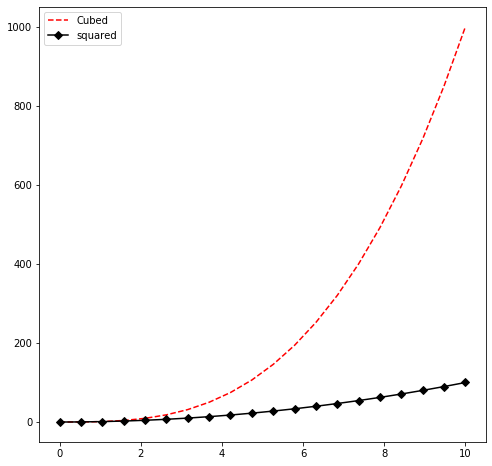

In [198]:
plt.figure(figsize=(8,8))
plt.plot(x,y, "--r", label="Cubed")
plt.plot(x, x**2, "D-k", label="squared")
plt.legend()

<BarContainer object of 4 artists>

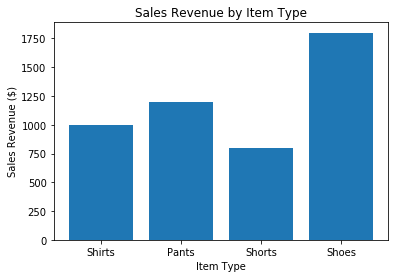

In [201]:
x = ['Shirts', 'Pants','Shorts','Shoes']
y = [1000, 1200, 800, 1800]
plt.title('Sales Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales Revenue ($)')
plt.bar(x, y)

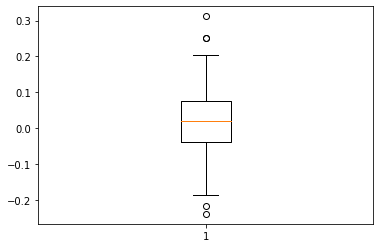

In [219]:
y = np.random.normal(loc=0, scale=0.1, size=100)
plt.boxplot(y)
plt.show()

In [222]:
from scipy.stats import shapiro
shap_w, shap_p = shapiro(y)
shap_w, shap_p

(0.9883351922035217, 0.5332409739494324)

In [224]:
from scipy.stats import zscore
y_z_scores = zscore(y)
y_z_scores

array([ 1.84985278,  0.59857334, -0.3655068 , -0.32830673, -0.45625589,
       -1.46301811, -2.06804379,  1.10111998,  0.53067051,  0.65337857,
        1.58216738, -0.67925651, -0.84107592,  0.88786471, -0.30885621,
       -1.59341962,  0.82134266, -2.38422976,  0.64571851,  0.55556519,
        0.57766206, -0.56996236, -0.00597515,  1.16435065, -0.26369217,
        0.4725421 ,  0.54416465,  0.32287113,  0.47121129, -0.54455489,
        0.31115413,  0.16904268, -0.27476562, -0.51786687, -0.61808481,
       -1.29094958,  1.05440174, -1.07983034,  0.57014901,  0.17254821,
       -0.53248268,  0.13444334,  0.9065548 ,  0.18005671,  0.33855   ,
       -2.60010946, -0.20293402,  0.79380344, -0.78623995, -0.50492544,
        0.68956566,  1.87391332, -1.02743568, -1.73285002, -0.89180849,
        0.08293444, -0.73717548,  0.42153779,  0.23147935,  0.37277941,
        0.02773516, -1.29767419, -0.01605787, -0.19999461, -0.10620994,
       -0.626005  ,  0.6500764 ,  0.46909196,  2.36890505,  0.16

In [120]:
def plotGraph(x, y1, y2, y1std, y2std, scl, lbl):    
    plt.plot(x, 
             y1, 
                     color="blue", marker="o", markersize=5, label="Training Accuracy")
    plt.fill_between(
        x, 
        y1 +y1std, 
        y1-y1std, 
                        color="blue", alpha=0.15)

    plt.plot(x, 
             y2, 
                     color="green", marker="s",linestyle="--", markersize=5, label="Validation Accuracy")
    plt.fill_between(
                    x, 
                    y2 +y2std, 
                    y2-y2std, 
                        color="green", alpha=0.15)

    plt.grid()
    plt.xlabel(lbl) #" Number of Training Example")
    plt.xscale(scl)
    plt.ylabel("Accuracy ")
    plt.legend(loc="lower right")
    plt.ylim([0.8, 1.01])
    plt.show()

# linear Curve. For LInearRegresssion`

In [119]:
from sklearn.model_selection import learning_curve

train_size, train_score, test_score =learning_curve(estimator=pipe, 
                                                    X=X_train, 
                                                    y=y_train,
                                                    train_sizes=np.linspace(0.1, 1, 10 ),
                                                    
                                                    cv=10 , n_jobs=1)

In [122]:
train_mean=np.mean(train_score, axis=1)
train_std= np.std (train_score, axis=1)
test_mean= np.mean(test_score,  axis=1)
test_std=  np.std (test_score,  axis=1)

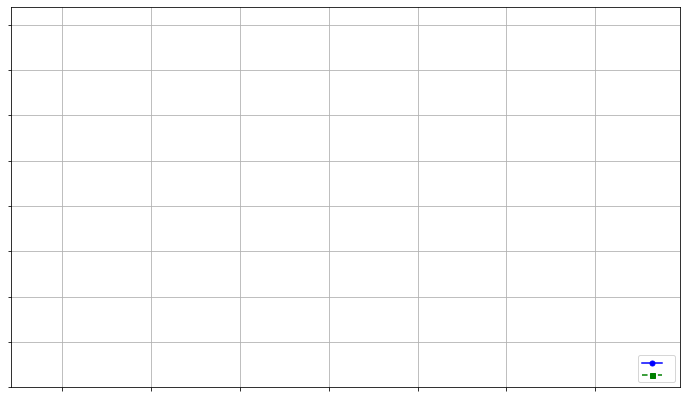

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plotGraph(train_size, train_mean, test_mean, 
          train_std, test_std,"linear", "Number of Training Example")